# Plotagem Básica com Matplotlib<a id='home'></a>

Arquivos necessários = `gdp_components_simple.csv`

Temos um controle sobre python agora: entendemos as estruturas de dados e o suficiente sobre como trabalhar com elas para passar para coisas mais diretamente relevantes para a análise de dados. Sabemos como obter dados no Pandas a partir de arquivos, como manipular DataFrames e como fazer estatísticas básicas.

Vamos começar a fazer números, sem dúvida a melhor maneira de transmitir informações sobre nossos dados. Nas próximas duas palestras, abordaremos o básico. Depois disso, vamos nos reagrupar e discutir sobre a comunicação visual eficaz de informações. Esta habilidade é muito subestimada. Falaremos sobre regras para torná-lo ótimo na comunicação de dados com gráficos.

Segue um resumo da palestra de hoje:

1. [Matplotlib](#matplotlib)


2. [Exportando Gráficos](#export)


3. [Histogramas](#histogramas)


4. [Subplots](#subplots)

## 1. Matpotlib<a id="matplotlib"></a>  [(return to top)](#home)

The package `matplotlib` is a very popular package that bundles tools for creating visualizations. The documentation is [here](https://matplotlib.org/contents.html). We will look at some specific plot types in class, but you can learn about many different types [thumbnail gallery](https://matplotlib.org/gallery/index.html). \[Warning: not all the figures in the thumbnail gallery are good figures.\]

Copy the `gdp_components_simple.csv` file into your cwd (or load it using a file path to its location) and load it into pandas.

In [1]:
import pandas as pd     #load the pandas package and call it pd
import matplotlib.pyplot as plt   # load the pyplot set of tools from the package matplotlib. Name it plt for short.

# This following is a jupyter magic command. It tells jupyter to insert the plots into the notebook
# rather than a new window.
%matplotlib inline      

In [2]:
gdp = pd.read_csv('/content/gdp_components_simple.csv', index_col=0)  # load data from file, make date the index

print(gdp.head(2))                                    # print the first and last few rows to make sure all is well
print('\n', gdp.tail(2))

                GDPA    GPDIA      GCEA   EXPGSA   IMPGSA
DATE                                                     
1990-01-01  5963.144  993.448  1238.556  551.873  629.727
1991-01-01  6158.129  944.344  1298.951  594.931  623.544

                  GDPA     GPDIA      GCEA    EXPGSA    IMPGSA
DATE                                                         
2016-01-01  18707.189  3169.887  3290.979  2217.576  2738.146
2017-01-01  19485.394  3367.965  3374.444  2350.175  2928.596


Vamos tornar o nome das variáveis mais intuitivos.

In [3]:
gdp.rename(columns = {'GDPA':'gdp', 'GPDIA':'inv', 'GCEA':'gov', 'EXPGSA':'ex', 'IMPGSA':'im' }, inplace=True)

Vamos plotar. Os gráficos do matplotlib são baseados em dois novos tipos de objetos.
1. O objeto **figura**: pense nisso como a **tela** na qual desenharemos as figuras.


2. O objeto **axes**: pense nele como a própria **figura** e todos os componentes.

Para criar uma nova figura, chamamos o método `subplots()` de `plt`. Observe o uso de atribuição múltipla.

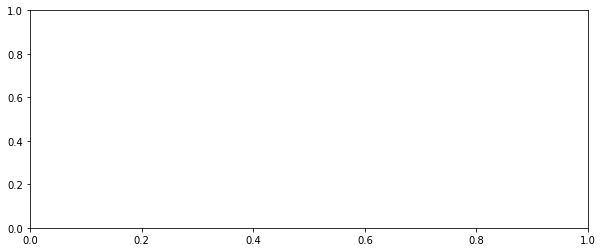

In [4]:
fig, ax = plt.subplots(figsize=(10,4))    # passing no arguments gets us one fig object and one axes object

In [5]:
print(type(fig))

print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


Aplicamos métodos aos eixos para realmente plotar os dados. Aqui está um gráfico de dispersão.

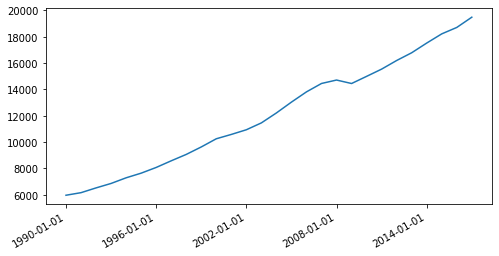

In [6]:
fig, ax = plt.subplots(figsize=(8,4)) 
fig.autofmt_xdate() # Interpreta o x como uma data
ax.plot(gdp.index, gdp['gdp'])     # scatter plot of gdp vs. time (where time is the index)
ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # Seta no máximo 5 valores no eixo x

**Primeiro**, observe que o gráfico é um objeto Line2D. Isso não é absolutamente importante para nós, mas quando você vê o jupyter imprimir `<matplotlib.lines.Line2D at ...>` é isso que ele está nos dizendo. Tudo em python é um objeto.

**Segundo**, um gráfico de dispersão precisa de duas colunas de dados, uma para a coordenada x e outra para a coordenada y. Estou usando `gdp` para a coordenada y e os anos para a coordenada x. Eu configurei anos como a variável de índice, então para recuperá-la eu usei o atributo `.index`.

**Terceiro**, este enredo precisa de algum trabalho. Eu não gosto dessa cor de linha. Mais importante, faltam rótulos e um título. Estes são **extremamente importantes.** Se alguém olhasse para esta foto, não teria ideia de quais dados/mensagens a foto está tentando transmitir. Isso é um problema!

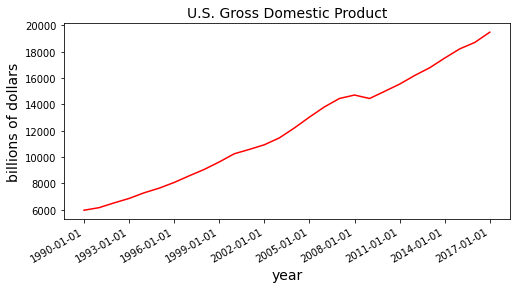

In [7]:
fig, ax = plt.subplots(figsize=(8,4)) 
fig.autofmt_xdate()
ax.plot(gdp.index, gdp['gdp'],        # line plot of gdp vs. time
        color='red'                   # set the line color to red
       )                  

ax.set_ylabel('billions of dollars', fontsize=14)  # add the y-axis label
ax.set_xlabel('year', fontsize=14)                 # add the x-axis label
ax.set_title('U.S. Gross Domestic Product', fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

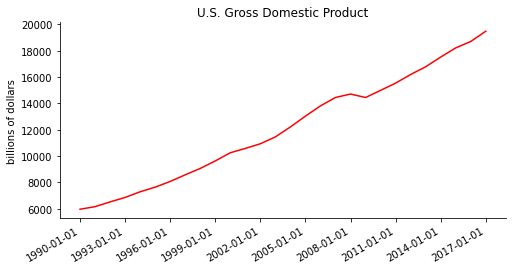

In [8]:
fig, ax = plt.subplots(figsize=(8,4)) 
fig.autofmt_xdate()
ax.plot(gdp.index, gdp['gdp'],        # line plot of gdp vs. time
        color='red'                   # set the line color to red
       )  

ax.set_ylabel('billions of dollars')  # add the y-axis label
# ax.set_xlabel('year')                 # add the x-axis label
ax.set_title('U.S. Gross Domestic Product')

ax.spines['right'].set_visible(False) # get rid of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

### Legendas e anotações
Temos duas linhas em nossa figura. Qual é qual? Não rotular nossa linha é uma má prática. Duas abordagens

1. Adicione uma legenda


2. Adicione texto à figura

Ambos são boas opções. Eu prefiro o segundo para parcelas simples. Além disso, as anotações de texto podem ser úteis para declarar eventos úteis nos dados. Por exemplo, poderíamos indicar grandes eventos mundiais como a Segunda Guerra Mundial.

In [9]:
plt.plot?

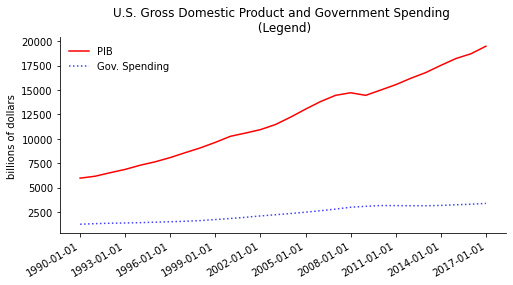

In [10]:
# The first option. Add labels to your plot commands, then call ax.legend.
fig, ax = plt.subplots(figsize=(8,4)) 
fig.autofmt_xdate()
ax.plot(gdp.index, gdp['gdp'],        # line plot of gdp vs. time
        color='red',                   # set the line color to red
       label = 'PIB'
       )  

ax.plot(gdp.index, gdp['gov'],        # line plot of gdp vs. time
        color='blue',                   # set the line color to blue
        alpha = 0.75,
        linestyle = ':',
        label = 'Gov. Spending'
       )  
ax.set_ylabel('billions of dollars')  # add the y-axis label
# ax.set_xlabel('year')                 # add the x-axis label
ax.set_title('U.S. Gross Domestic Product and Government Spending \n (Legend)')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.legend(frameon=False)              # Show the legend. frameon=False kills the box around the legend
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

## 2. Exportando Gráficos<a id="export"></a> [(retornar ao início)](#home)
Vamos aprender como exportar nossos gráficos para um pdf.

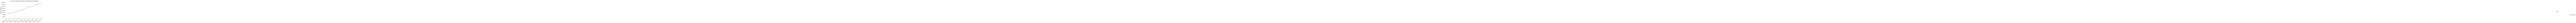

In [11]:
fig, ax = plt.subplots(figsize=(8,4)) 
fig.autofmt_xdate()
ax.plot(gdp.index, gdp['gdp'],        # line plot of gdp vs. time
        color='red',                   # set the line color to red
       label = 'GDP'
       )  

ax.plot(gdp.index, gdp['gov'],        # line plot of gdp vs. time
        color='blue',                   # set the line color to blue
        alpha = 0.75,
        linestyle = ':',
        label = 'Gov. Spending'
       )  
ax.set_ylabel('billions of dollars')  # add the y-axis label
# ax.set_xlabel('year')                 # add the x-axis label
ax.set_title('U.S. Gross Domestic Product and Government Spending')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.text(1989, 8500, 'GDP')            # text(x, y, string)
ax.text(1999, 4500, 'Gov. Spending')  # text(x, y, string)
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Set the max number of x tickets

plt.savefig('gdp.pdf')          # Create a pdf and save to cwd 
plt.savefig('gdp.png')          # Create a png and save to the folder that contains the cwd

Você também pode definir coisas como orientação, dpi e metadados. Verifique a documentação se precisar ajustar sua saída.

## Exercícios - Séries Temporais

In [12]:
gdp.head()

,gdp,inv,gov,ex,im
DATE,,,,,
1990-01-01,5963.144,993.448,1238.556,551.873,629.727
1991-01-01,6158.129,944.344,1298.951,594.931,623.544
1992-01-01,6520.327,1013.006,1344.500,633.053,667.791
1993-01-01,6858.559,1106.826,1364.922,654.799,719.973
1994-01-01,7287.236,1256.484,1402.274,720.937,813.424


### Plotar todas as grandezas

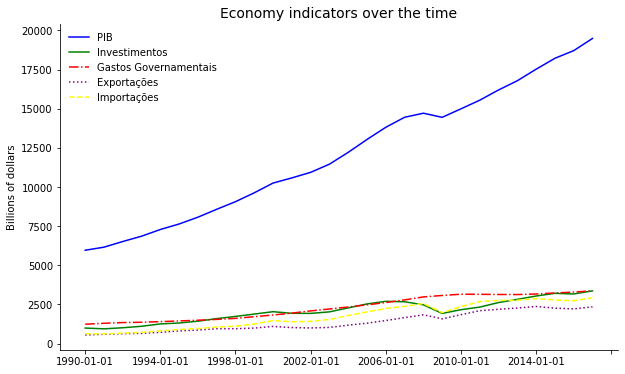

In [31]:
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.plot(gdp.index, gdp['gdp'], color='blue', label='PIB')
ax.plot(gdp.index, gdp['inv'], color='green', label='Investimentos', linestyle='-')
ax.plot(gdp.index, gdp['gov'], color='red', label='Gastos Governamentais', linestyle='-.')
ax.plot(gdp.index, gdp['ex'], color='purple', label='Exportações', linestyle=':')
ax.plot(gdp.index, gdp['im'], color='yellow', label='Importações', linestyle='--')

ax.set_title('Economy indicators over the time', fontsize=14)
ax.set_ylabel('Billions of dollars')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(frameon=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(8))

plt.show()

## 3. Histogramas<a id="histograms"></a> [(retornar ao início)](#home)
O gráfico de linha é a ponta do iceberg. matplotlib suporta muitos tipos de plotagem. Vamos dar uma olhada nos histogramas.

P: Quão variável é o crescimento do PIB dos EUA?

In [14]:
# Create a histogram of gdp growth rates.
gdp['gdp_growth'] = gdp['gdp'].pct_change()*100
gdp.head()

,gdp,inv,gov,ex,im,gdp_growth
DATE,,,,,,
1990-01-01,5963.144,993.448,1238.556,551.873,629.727,NaN
1991-01-01,6158.129,944.344,1298.951,594.931,623.544,3.269836
1992-01-01,6520.327,1013.006,1344.500,633.053,667.791,5.881624
1993-01-01,6858.559,1106.826,1364.922,654.799,719.973,5.187347
1994-01-01,7287.236,1256.484,1402.274,720.937,813.424,6.250249


Poderíamos ter usado os métodos `diff()` ou `shift()` para fazer algo semelhante, mas o método `pct_change()` é bastante eficaz!

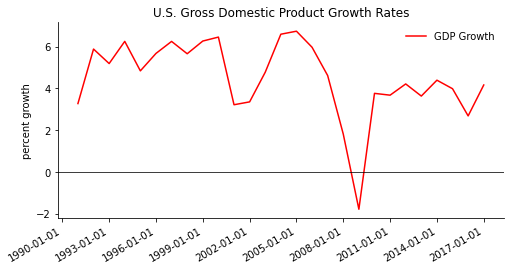

In [44]:
fig, ax = plt.subplots(figsize=(8,4)) 
fig.autofmt_xdate()
ax.plot(gdp.index, gdp['gdp_growth'],        # line plot of gdp vs. time
        color='red',                   # set the line color to red
       label = 'GDP Growth'
       )

ax.set_ylabel('percent growth')  # add the y-axis label
ax.set_title('U.S. Gross Domestic Product Growth Rates')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.legend(frameon=False)

ax.axhline(y=0, color='black', linewidth=0.75)  # Add a horizontal line at y=0
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

Veja o destaque da crise de 2008.

A adição da linha zero permite que o leitor veja facilmente que as taxas de crescimento são em sua maioria positivas e que a crise de 2008 gerou bastante impacto. Vamos deixa-la tracejada:

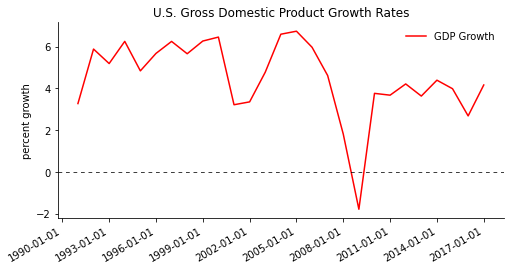

In [72]:
fig, ax = plt.subplots(figsize=(8,4)) 
fig.autofmt_xdate()
ax.plot(gdp.index, gdp['gdp_growth'],        # line plot of gdp vs. time
        color='red',                   # set the line color to red
       label = 'GDP Growth'
       )  

ax.set_ylabel('percent growth')  # add the y-axis label
ax.set_title('U.S. Gross Domestic Product Growth Rates')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.axhline(y=0, color='black', linewidth=0.75, dashes=[5,5])  # Add a dashed horizontal line at y=0

ax.legend(frameon=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

Desta vez, adicionei uma linha tracejada usando o argumento `dashes`, onde a sequência de traços é uma série de comprimentos ativados/desativados em pontos, por exemplo. [5, 5] significa linhas longas de 5pt separadas por espaços em branco de 5pt.

Vamos usar um histograma para avaliar a volatilidade do PIB:

No handles with labels found to put in legend.


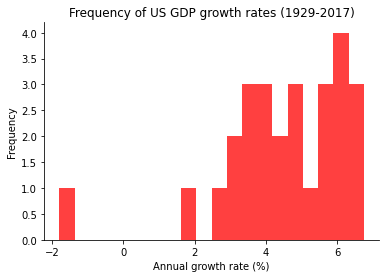

In [46]:
fig, ax = plt.subplots() 

# hist does not like NaN. (I'm a bit surprised.) I use the dropna() method to kill off the missing value
ax.hist(gdp['gdp_growth'].dropna(), bins=20, color='red', alpha=0.75)        # histogram of GDP growth rates
      

ax.set_ylabel('Frequency')  # add the y-axis label
ax.set_xlabel('Annual growth rate (%)')
ax.set_title('Frequency of US GDP growth rates (1929-2017)')

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

#ax.axhline(y=0, color='black', linewidth=0.75)  # Add a horizontal line at y=0
ax.legend(frameon=False)

plt.show()

### Investiment Growth Percentage

In [34]:
gdp['inv_growth'] = gdp['inv'].pct_change() * 100
gdp.head()

,gdp,inv,gov,ex,im,gdp_growth,inv_growth
DATE,,,,,,,
1990-01-01,5963.144,993.448,1238.556,551.873,629.727,NaN,NaN
1991-01-01,6158.129,944.344,1298.951,594.931,623.544,3.269836,-4.942785
1992-01-01,6520.327,1013.006,1344.500,633.053,667.791,5.881624,7.270867
1993-01-01,6858.559,1106.826,1364.922,654.799,719.973,5.187347,9.261544
1994-01-01,7287.236,1256.484,1402.274,720.937,813.424,6.250249,13.521367


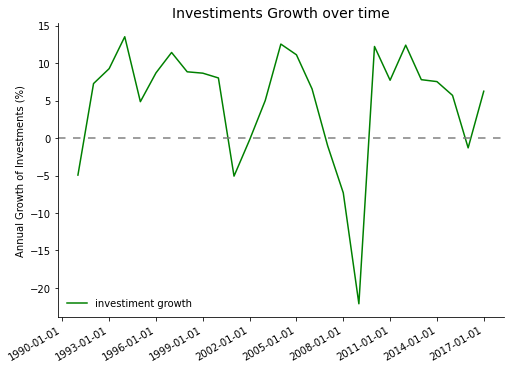

In [99]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.autofmt_xdate()

ax.plot(gdp.index, gdp['inv_growth'], label='investiment growth', color='green')

ax.set_title('Investiments Growth over time', fontsize=14)
ax.set_ylabel('Annual Growth of Investments (%)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axhline(y=0, color='gray', dashes=[5, 5])

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(frameon=False)

plt.show()

Agora, vejamos a frequência dos crescimentos percentuais dos investimentos ao longo dos anos:

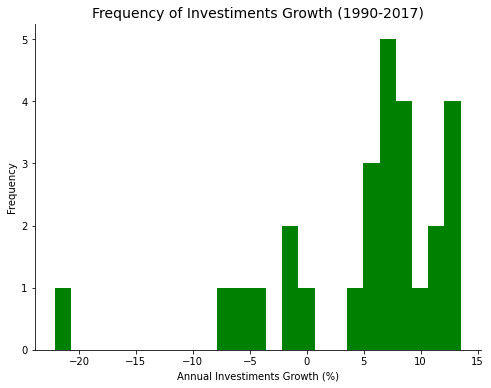

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(gdp['inv_growth'].dropna(), bins=25, color='green')

ax.set_title('Frequency of Investiments Growth (1990-2017)', fontsize=14)
ax.set_xlabel('Annual Investiments Growth (%)')
ax.set_ylabel('Frequency')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

### Governamental Expends Percentage

In [58]:
gdp['gov_growth'] = gdp['gov'].pct_change() * 100

In [59]:
gdp.head()

,gdp,inv,gov,ex,im,gdp_growth,inv_growth,gov_growth
DATE,,,,,,,,
1990-01-01,5963.144,993.448,1238.556,551.873,629.727,NaN,NaN,NaN
1991-01-01,6158.129,944.344,1298.951,594.931,623.544,3.269836,-4.942785,4.876243
1992-01-01,6520.327,1013.006,1344.500,633.053,667.791,5.881624,7.270867,3.506599
1993-01-01,6858.559,1106.826,1364.922,654.799,719.973,5.187347,9.261544,1.518929
1994-01-01,7287.236,1256.484,1402.274,720.937,813.424,6.250249,13.521367,2.736567


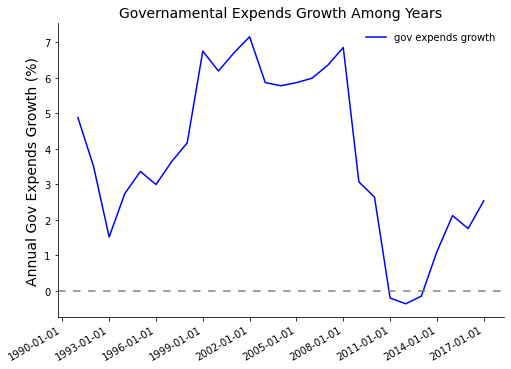

In [97]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.autofmt_xdate()

ax.plot(gdp.index, gdp['gov_growth'], color='blue', label='gov expends growth')

ax.set_title('Governamental Expends Growth Among Years', fontsize=14)
ax.set_ylabel('Annual Gov Expends Growth (%)', fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.axhline(y=0, color='gray', dashes=[5, 5])

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(frameon=False)

plt.show()

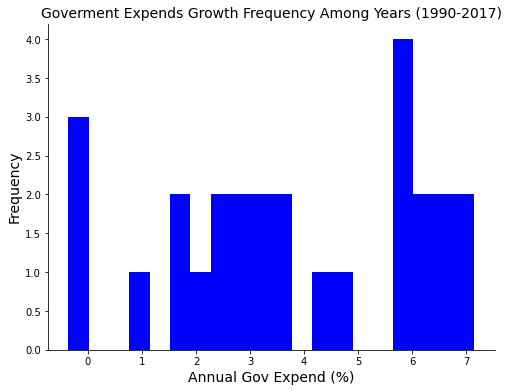

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(gdp['gov_growth'].dropna(), bins=20, color='blue') 

ax.set_title('Goverment Expends Growth Frequency Among Years (1990-2017)', fontsize=14)

ax.set_xlabel('Annual Gov Expend (%)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

### Exportations Growth

In [74]:
gdp['ex_growth'] = gdp['ex'].pct_change() * 100
gdp.head()

,gdp,inv,gov,ex,im,gdp_growth,inv_growth,gov_growth,ex_growth
DATE,,,,,,,,,
1990-01-01,5963.144,993.448,1238.556,551.873,629.727,NaN,NaN,NaN,NaN
1991-01-01,6158.129,944.344,1298.951,594.931,623.544,3.269836,-4.942785,4.876243,7.802157
1992-01-01,6520.327,1013.006,1344.500,633.053,667.791,5.881624,7.270867,3.506599,6.407802
1993-01-01,6858.559,1106.826,1364.922,654.799,719.973,5.187347,9.261544,1.518929,3.435099
1994-01-01,7287.236,1256.484,1402.274,720.937,813.424,6.250249,13.521367,2.736567,10.100504


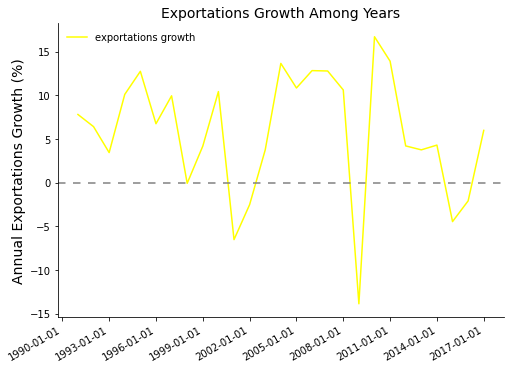

In [94]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.autofmt_xdate()

ax.plot(gdp.index, gdp['ex_growth'], color='yellow', label='exportations growth')

ax.set_title('Exportations Growth Among Years', fontsize=14)
ax.set_ylabel('Annual Exportations Growth (%)', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axhline(y=0, color='gray', dashes=[5, 5])

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(frameon=False)

plt.show()

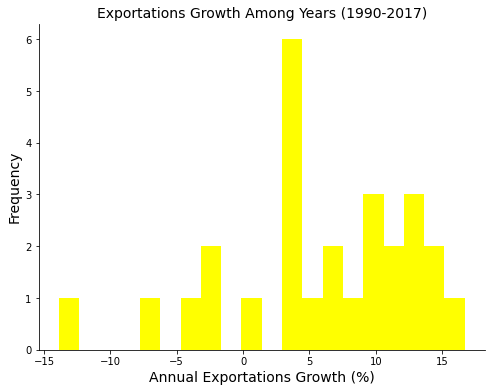

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(gdp['ex_growth'].dropna(), color='yellow', bins=20) 
ax.set_title('Exportations Growth Among Years (1990-2017)', fontsize=14)

ax.set_xlabel('Annual Exportations Growth (%)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

### Importations Growth

In [89]:
gdp['im_growth'] = gdp['im'].pct_change() * 100
gdp.head()

,gdp,inv,gov,ex,im,gdp_growth,inv_growth,gov_growth,ex_growth,im_growth
DATE,,,,,,,,,,
1990-01-01,5963.144,993.448,1238.556,551.873,629.727,NaN,NaN,NaN,NaN,NaN
1991-01-01,6158.129,944.344,1298.951,594.931,623.544,3.269836,-4.942785,4.876243,7.802157,-0.981854
1992-01-01,6520.327,1013.006,1344.500,633.053,667.791,5.881624,7.270867,3.506599,6.407802,7.096051
1993-01-01,6858.559,1106.826,1364.922,654.799,719.973,5.187347,9.261544,1.518929,3.435099,7.814121
1994-01-01,7287.236,1256.484,1402.274,720.937,813.424,6.250249,13.521367,2.736567,10.100504,12.979792


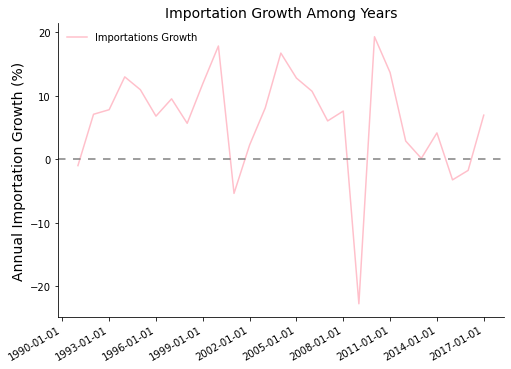

In [95]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.autofmt_xdate()

ax.plot(gdp.index, gdp['im_growth'], color='pink', label='Importations Growth')

ax.set_title('Importation Growth Among Years', fontsize=14)
ax.set_ylabel('Annual Importation Growth (%)', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axhline(y=0, color='gray', dashes=[5, 5])

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(frameon=False)

plt.show()

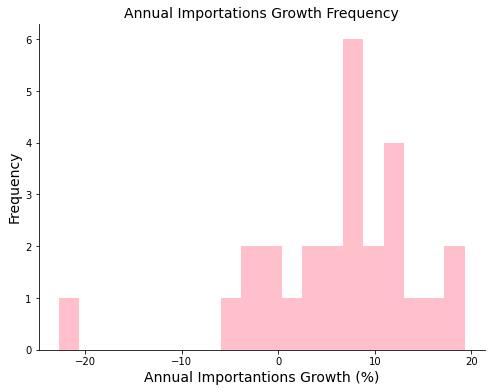

In [101]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(gdp['im_growth'].dropna(), bins=20, color='pink') 

ax.set_title('Annual Importations Growth Frequency', fontsize=14)
ax.set_xlabel('Annual Importantions Growth (%)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## 4. Subplots<a id="subplots"></a> [(retornar ao início)](#home)
Podemos gerar vários eixos em uma figura usando o método `subplot()`. 

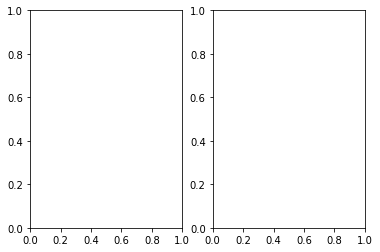

In [18]:
fig, ax = plt.subplots(1, 2)  # one row, two columns of axes

In [19]:
print(type(ax))

<class 'numpy.ndarray'>


Então `ax` é agora um array que contém os eixos para cada plot. Cada eixo funciona como antes. Agora só temos que dizer ao python **quais** eixos para agir.

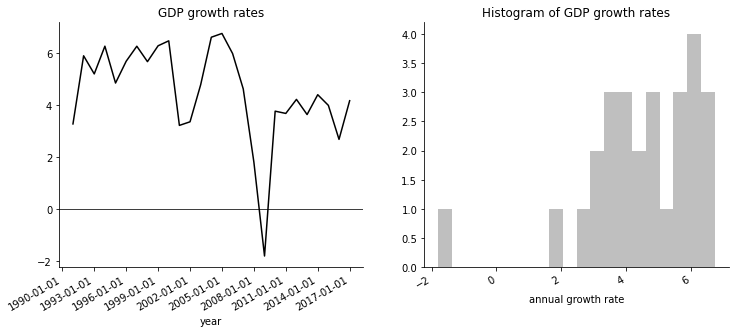

In [20]:
# Set a variable for plot color so I can change it everywhere easily
my_plot_color = 'black'

# I am using the figsize parameter here. It takes (width, height) in inches. 
fig, ax = plt.subplots(1, 2, figsize=(12,5))  # one row, two columns of axes
fig.autofmt_xdate()
# The fist plot
ax[0].plot(gdp.index, gdp['gdp_growth'], color=my_plot_color, label = 'GDP Growth')     # a line plot of GDP growth rates
ax[0].axhline(y=0, color='black', linewidth=0.75)  # Add a horizontal line at y=0
ax[0].set_xlabel('year')
ax[0].set_title('GDP growth rates')
ax[0].spines['right'].set_visible(False) # get ride of the line on the right
ax[0].spines['top'].set_visible(False)   # get rid of the line on top
ax[0].xaxis.set_major_locator(plt.MaxNLocator(10))

# The second plot
ax[1].hist(gdp['gdp_growth'].dropna(), bins=20, color=my_plot_color, alpha=0.25)        # histogram of GDP growth rates
ax[1].set_xlabel('annual growth rate')
ax[1].set_title('Histogram of GDP growth rates')
ax[1].spines['right'].set_visible(False) # get ride of the line on the right
ax[1].spines['top'].set_visible(False)   # get rid of the line on top

plt.savefig('double.pdf')
plt.show()


## Plotando todas as grandezas em uma figura com 5 plots (ax)

In [112]:
gdp.head(1)

,gdp,inv,gov,ex,im,gdp_growth,inv_growth,gov_growth,ex_growth,im_growth
DATE,,,,,,,,,,
1990-01-01,5963.144,993.448,1238.556,551.873,629.727,NaN,NaN,NaN,NaN,NaN


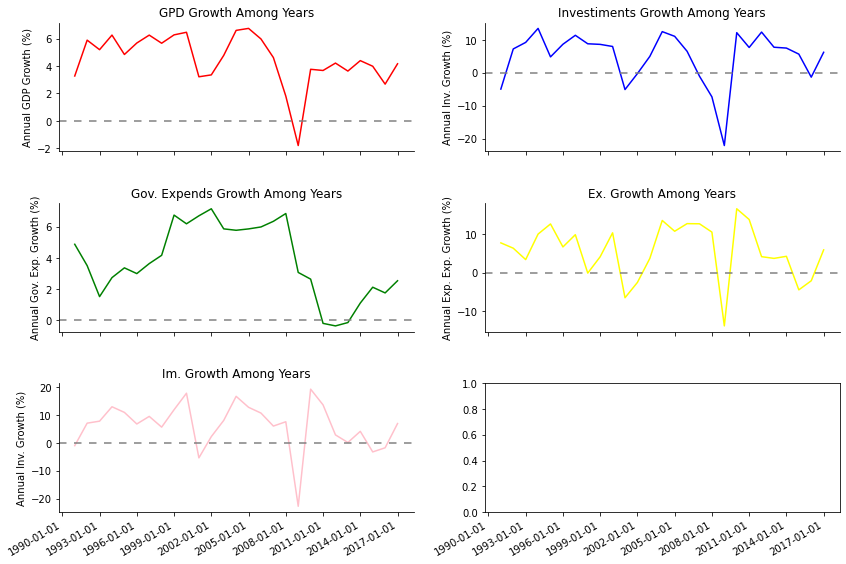

In [131]:
fig, ax = plt.subplots(3, 2, sharex=True, figsize=(14, 10))
fig.autofmt_xdate()

# Plotting gdp growth
ax[0][0].plot(gdp.index, gdp['gdp_growth'], color='red')
ax[0][0].set_title('GPD Growth Among Years')
ax[0][0].set_ylabel('Annual GDP Growth (%)')
ax[0][0].xaxis.set_major_locator(plt.MaxNLocator(10))
ax[0][0].axhline(y=0, color='gray', dashes=[5, 5])
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)

# Plotting invesiments growth
ax[0][1].plot(gdp.index, gdp['inv_growth'], color='blue')
ax[0][1].set_title('Investiments Growth Among Years')
ax[0][1].set_ylabel('Annual Inv. Growth (%)')
ax[0][1].xaxis.set_major_locator(plt.MaxNLocator(10))
ax[0][1].axhline(y=0, color='gray', dashes=[5, 5])
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)

# Plotting Govermental Growth
ax[1][0].plot(gdp.index, gdp['gov_growth'], color='green')
ax[1][0].set_title('Gov. Expends Growth Among Years')
ax[1][0].set_ylabel('Annual Gov. Exp. Growth (%)')
ax[1][0].xaxis.set_major_locator(plt.MaxNLocator(10))
ax[1][0].axhline(y=0, color='gray', dashes=[5, 5])
ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)

# Plotting Exportation Growth
ax[1][1].plot(gdp.index, gdp['ex_growth'], color='yellow')
ax[1][1].set_title('Ex. Growth Among Years')
ax[1][1].set_ylabel('Annual Exp. Exp. Growth (%)')
ax[1][1].xaxis.set_major_locator(plt.MaxNLocator(10))
ax[1][1].axhline(y=0, color='gray', dashes=[5, 5])
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)

# Plotting Importation Growth
ax[2][0].plot(gdp.index, gdp['im_growth'], color='pink')
ax[2][0].set_title('Im. Growth Among Years')
ax[2][0].set_ylabel('Annual Inv. Growth (%)')
ax[2][0].xaxis.set_major_locator(plt.MaxNLocator(10))
ax[2][0].axhline(y=0, color='gray', dashes=[5, 5])
ax[2][0].spines['top'].set_visible(False)
ax[2][0].spines['right'].set_visible(False)

fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()